## **Jump around**


**due: Friday, Oct. 14 at 11:59 pm**

In this project we are going to explore the following algorithm:

0. Start with a regular triangle
1. Select a random point $\mathbf{p}_0$ inside the triangle
2. Select a vertex  $\mathbf{v}$ of the triangle at random
3. The point $\mathbf{p}_1$ is found moving a fraction $f=\frac{1}{2}$ of the distance between $\mathbf{p}_0$ and $\mathbf{v}$ in the direction of $\mathbf{v}$
4. Store $\mathbf{p}_1$ in a container and update $\mathbf{p}_0$ = $\mathbf{p}_1$
5. Go back at step 2 (repeat steps 2-5 for a _large_ number of times)
6. Sketch all of the points obtained, except the first $m$ (where $m$ is a _small_ number)

**Ex.1** Write a Python function `vertices(n)`. The function should return the vertices of a regular cyclic polygon with `n` sides (inscribed in a circle with radius 1)

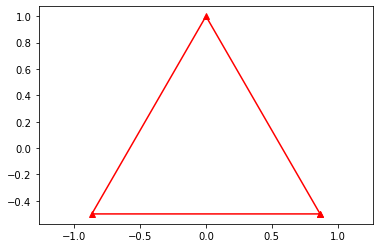

In [10]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mplPath

def vertexes(n=3): # return vertices of regular polygon
    start_angle = - (n-2)*np.pi/(2*n) # fix start angle so that
                                      # one side of the polygon will be horizontal
    end_angle = start_angle + 2*np.pi
    
    angles = np.linspace(start_angle,end_angle,n+1) # linspace of angles needed
    
    v = [(np.cos(x),np.sin(x)) for x in angles] # polygon vertexes with repetition
    
    return np.array(v) # note: one vertex is repeated twice
                        # first and last vertex are the same

v=vertexes(3)
#plt.figure(figsize=(10,10))
plt.plot(v[:,0],v[:,1],'^r-')
plt.axis('equal');
plt.savefig('img1.png')

![figure_1](img1.png "")

**Ex.2** Write a Python function `pick_p0` that selects the initial point $\mathbf{p}_0$ for the algorithm 

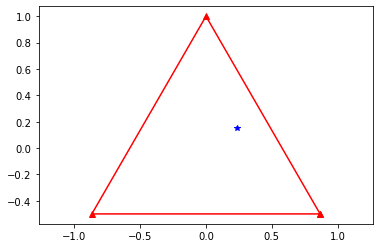

In [40]:
def pick_P0(v,xl=-1,xr=1,yd=-1,yu=1):
    # v = vertexes pf polygon (w/o repetitions)
    # xl : left limit, xr : right limit for random choice
    # yd : lower limit, yu : upper limit for random choice
    
    poly_path = mplPath.Path(v) # create path with vertexes
    
    not_in_poly = True # by default not in polygon
    
    while not_in_poly: # pick random point and check if it is in the polygon
        x = np.random.random() * (xr-xl) + xl
        y = np.random.random() * (yu-yd) + yd
        not_in_poly = not poly_path.contains_point( (x,y) )
        #print(x,y,not_in_poly)
        
    return (x,y)

v=vertexes(3)
p=pick_P0(v[:-1])
#plt.figure(figsize=(10,10))
plt.plot(v[:,0],v[:,1],'^r-')
plt.plot(p[0],p[1],'*b')
plt.axis('equal');
plt.savefig('img2.png');

![figure_2](img2.png "")

**Note**: The python module `matplotlib.path` can be used to check if a point is contained inside of a polygon as follows:

consider

* `v=[(0,0),(0,1),(1,1),(1,0)]` vertexes of a square
* `P=(0.5,0.5)` point inside the square
* `Q=(1.1,1.1)` point outside the square
* Use `Path(v)` to create a path with the given vertexes
* Use `contains_point( (x,y) )` to check if the point is inside the path

In [36]:
import matplotlib.path as mplPath # import module with alias

v=[(0,0),(0,1),(1,1),(1,0)] # vertexes of a square
P=(0.5,0.5) # point inside the square
Q=(1.1,1.1) # point outside the square

poly_path = mplPath.Path(v) # create path with vertexes

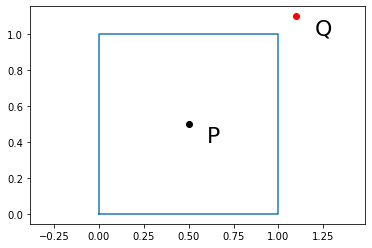

In [41]:
v=[(0,0),(0,1),(1,1),(1,0),(0,0)]
x,y=zip(*v)
plt.axis("equal")
plt.plot(P[0],P[1],'ok')
plt.text(P[0]+0.1, P[1]-0.1, 'P', fontsize = 22)
plt.plot(Q[0],Q[1],'or')
plt.text(Q[0]+0.1, Q[1]-0.1, 'Q', fontsize = 22)
plt.plot(x,y);
plt.savefig('img3.png');

![figure_3](img3.png "")

The function `contains_point( (x,y) )` returns `True` if the point is contained in the path `poly_path` and `False` otherwise

In [14]:
poly_path.contains_point(P)

True

In [15]:
poly_path.contains_point(Q)

False

**Ex.3** Write a Python function `pick_p1` that given $\mathbf{p}_0$ will find the next point, $\mathbf{p}_1$, in the algorithm 

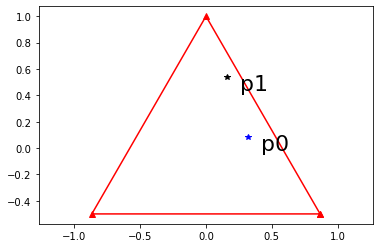

In [44]:
def pick_P1(v,P0,f=0.5,cond=None,ktmp=-1):
    # v : vertexes w/o repetitions
    # P0 : initial point selected at random
    # f : number between 0 and 1 that determines
    #   how much of the distance between x0 and the chosen vertex is covered
    # cond : special condition for chosing next vertex
    #        None : no condition
    #        'norepeat' : the same vertex cannot be chosen twice in a row
    # ktmp : vertex chosen last time 
        
    k = np.random.randint(len(v)) # select a vertex at random [0,n)
    
    if cond == 'norepeat':
        while k == ktmp:
            k = np.random.randint(len(v)) # select a vertex at random [0,n)
        ktmp=k
        
    
    xv,yv = v[k,0],v[k,1] # coords of chosen vertex
    x0,y0 = P0[0],P0[1]
    
    x = f * xv + (1-f) * x0
    y = f * yv + (1-f) * y0
        
    return (x,y),ktmp
    

v=vertexes(3)
p0=pick_P0(v[:-1])
p1,ktmp=pick_P1(v[:-1],p0)
#plt.figure(figsize=(10,10))
plt.plot(v[:,0],v[:,1],'^r-')
plt.plot(p0[0],p0[1],'*b')
plt.text(p0[0]+0.1, p0[1]-0.1, 'p0', fontsize = 22)
plt.plot(p1[0],p1[1],'*k')
plt.text(p1[0]+0.1, p1[1]-0.1, 'p1', fontsize = 22)
plt.axis('equal');
plt.savefig('img4.png');

![figure_4](img4.png "")


<font size="+2"> **Project:** </font>

Explore, describe and analyze the results produced by the algorithm for different regular polygons ($n\geq 3$), different values of $f$.

**Note/Suggestion**: Some choices for the value of $n$ might give more "interesting" results than other values. If the result obtained does not look very "interesting" it might be of value to add some constrain on the way the vertex $\mathbf{v}$ is chosen.

Here is an example with 20 points for the regular triangle ($n=3$)

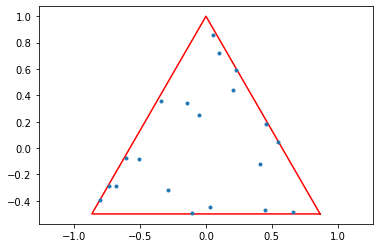

In [46]:
def sierp(v,niter=100000,f=0.5,cond=None):
    
    # v : vertexes w/o repetitions
    # niter : number of iterations
    # f : number between 0 and 1 that determines
    #   how much of the distance between x0 and the chosen vertex is covered
    # cond : special condition for chosing next vertex
    #        None : no condition
    #        'norepeat' : the same vertex cannot be chosen twice in a row
    
    x=np.zeros(niter) # storage for x and y coordinates of points
    y=np.zeros(niter)
    
    p0=pick_P0(v) # initial point at random
    
    ktmp=-1 # temporary choice of vertex. needed if cond=='norepeat'
    
    for k in range(niter):
        p1,ktmp=pick_P1(v,p0,f=f,cond=cond,ktmp=ktmp)
        x[k]=p1[0]
        y[k]=p1[1]
        p0=p1
    
    P=np.column_stack([x,y])
    
    return P

v=vertexes(3)
P=sierp(v[:-1],niter=20)
plt.plot(v[:,0],v[:,1],'r-')
plt.plot(P[:,0],P[:,1],'o',markersize=3)
plt.axis('equal');
plt.savefig('img5.png');

![figure_5](img5.png "")